# Ajuste de curvas desde una perspectiva probabilística

![BLR](https://upload.wikimedia.org/wikipedia/commons/e/ed/Residuals_for_Linear_Regression_Fit.png)

> **Objetivos:**
> - Recordar el ajuste de curvas polinomiales.
> - Entender el fenómeno de overfitting en casos prácticos.
> - Explicar los mínimos cuadrados ordinaros mediante el principio de máxima verosimilitud.

> **Referencias:**
> 
> - Pattern Recognition and Machine Learning, by Christopher M. Bishop - Cap. 3.1.

## 1. Introducción

Al día de hoy todos debemos haber ajustado una línea recta (plano, o hiperplano) de la forma

$$
f(x) = w_1 x^{(1)} + w_2 x^{(2)} + \dots + w_d x^{(d)} = x^T w \qquad \text{(generalmente el primer término es de bias $x^{(1)} = 1$)}
$$

a un conjunto de puntos $\{(x_i, y_i)\}_{i=1}^{N}$, con $x_i\in\mathbb{R}^{d}$ y $y_i\in\mathbb{R}$, y parámetros $w\in\mathbb{R}^{d}$. Esto normalmente se hace bajo el enfoque de mínimos cuadrados, es decir:

$$
\hat{w} = \arg \min_{w} ||y - Xw||^2,
$$
  
donde 
 
$$
  X = \left[\begin{array}{ccc}
  - & x_1^T  & - \\
  - & x_2^T  & - \\
    & \vdots &   \\
  - & x_N^T  & - \\
  \end{array}\right] \in \mathbb{R}^{N \times d}, \qquad y = \left[\begin{array}{ccc}
  y_1 \\
  y_2 \\
  \vdots \\
  y_N \\
  \end{array}\right] \in \mathbb{R}^{N}.
$$

Este modelo es probablemente el más simple, ya que involucra únicamente una combinación lineal de las variables de entrada. Al ser lineal, es un modelo bastante limitado.

Por tanto, podemos extender este tipo de modelos para considerar combinaciones lineales de funciones no-lineales de las variables de entrada, de la forma:

$$
f(x) = w_1 \phi_1(x) + w_2 \phi_2(x) + \dots + w_d \phi_d(x) = \phi(x)^T w \qquad \text{(generalmente el primer término es de bias $\phi_1(x) = 1$)},
$$

donde $\phi = \left[\phi_1, \phi_2, \dots, \phi_d\right] \in \mathbb{R}^d$. De esta manera podemos modelar relaciones mucho más complejas. Este tipo de funciones las seguimos llamando **lineales** puesto que lo son respecto a los parámetros $w$.

En este caso, los parámetros los encontramos como

$$
\hat{w} = \arg \min_{w} ||y - \Phi w||^2,
$$

donde

$$
\Phi = \left[
    \begin{array}{ccc}
    - & \phi(x_1)^T  & - \\
    - & \phi(x_2)^T  & - \\
      & \vdots       &   \\
    - & \phi(x_N)^T  & - \\
    \end{array}
\right] \in \mathbb{R}^{N \times d}.
$$

Una elección común de las funciones $\phi_j(x) = x^{j-1}$, para lograr funciones polinomiales.

In [1]:
# Importamos librerías
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# Generamos datos ficticios
N = 20
x = np.linspace(0, 1, N)
y = np.sin(2 * np.pi * x) + 0.3 * np.random.normal(size=N)

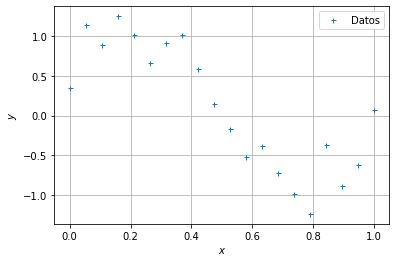

In [3]:
# Gráfica de los datos
plt.plot(x, y, '+', ms=5, label='Datos')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()
plt.legend(loc="best")

### Ajuste de curvas

In [4]:
# sklearn.model_selection.train_test_split
from sklearn.model_selection import train_test_split
# sklearn.preprocessing.PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
# sklearn.linear_model.LinearRegression
from sklearn.linear_model import LinearRegression
# sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import StandardScaler
# sklearn.pipeline.Pipeline
from sklearn.pipeline import Pipeline

In [5]:
PolynomialFeatures?

Grado 3

In [6]:
# Definición del modelo
model_3 = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('lin_reg', LinearRegression())
])

In [7]:
train_test_split?

In [8]:
# Split train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [9]:
# Ajuste del modelo
model_3.fit(X=x_train.reshape(-1, 1), y=y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

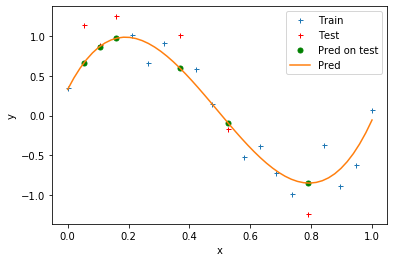

In [10]:
# Visualización del modelo
x_eval = np.linspace(0, 1)
plt.plot(x_train, y_train, '+', ms=5, label="Train")
plt.plot(x_test, y_test, '+r', ms=5, label="Test")
plt.plot(x_test, model_3.predict(x_test.reshape(-1, 1)), 'og', ms=5, label="Pred on test")
plt.plot(x_eval, model_3.predict(x_eval.reshape(-1, 1)), label="Pred")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

In [11]:
# Score sobre datos de entrenamiento
model_3.score(x_train.reshape(-1, 1), y_train)

0.9137087328358074

In [12]:
# Score sobre datos de prueba
model_3.score(x_test.reshape(-1, 1), y_test)

0.867648663907635

Grado 10

In [13]:
# Definición del modelo
model_10 = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=10)),
    ('scaler', StandardScaler()),
    ('lin_reg', LinearRegression())
])

In [14]:
# Ajuste del modelo
model_10.fit(X=x_train.reshape(-1, 1), y=y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=10, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

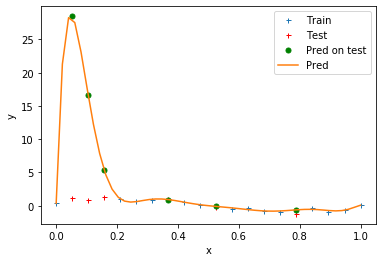

In [15]:
# Visualización del modelo
x_eval = np.linspace(0, 1)
plt.plot(x_train, y_train, '+', ms=5, label="Train")
plt.plot(x_test, y_test, '+r', ms=5, label="Test")
plt.plot(x_test, model_10.predict(x_test.reshape(-1, 1)), 'og', ms=5, label="Pred on test")
plt.plot(x_eval, model_10.predict(x_eval.reshape(-1, 1)), label="Pred")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

In [16]:
# Score sobre datos de entrenamiento
model_10.score(x_train.reshape(-1, 1), y_train)

0.9666314002396119

In [17]:
# Score sobre datos de prueba
model_10.score(x_test.reshape(-1, 1), y_test)

-208.34177959156807

### Overfitting

In [18]:
model_3.named_steps['lin_reg'].coef_

array([ 0.        ,  2.2019304 , -7.94092752,  5.43306589])

In [19]:
model_10.named_steps['lin_reg'].coef_

array([ 0.00000000e+00,  4.39531695e+02, -8.83408361e+03,  6.92569736e+04,
       -2.97576936e+05,  7.88529476e+05, -1.34752327e+06,  1.49179916e+06,
       -1.03479006e+06,  4.09028811e+05, -7.03270148e+04])

### ¿Cómo lidiar con el overfitting? 

#### 1. Regularización

In [20]:
# Regularización
from sklearn.linear_model import Ridge

In [21]:
Ridge?

In [72]:
# Definición del modelo
model_10_reg = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=10)),
    ('scaler', StandardScaler()),
    ('lin_reg', Ridge(alpha=1e-3))
])

In [73]:
# Ajuste del modelo
model_10_reg.fit(X=x_train.reshape(-1, 1), y=y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=10, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_reg',
                 Ridge(alpha=0.001, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

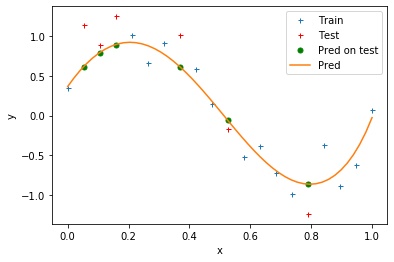

In [74]:
# Visualización del modelo
x_eval = np.linspace(0, 1)
plt.plot(x_train, y_train, '+', ms=5, label="Train")
plt.plot(x_test, y_test, '+r', ms=5, label="Test")
plt.plot(x_test, model_10_reg.predict(x_test.reshape(-1, 1)), 'og', ms=5, label="Pred on test")
plt.plot(x_eval, model_10_reg.predict(x_eval.reshape(-1, 1)), label="Pred")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

In [75]:
# Score sobre datos de entrenamiento
model_10_reg.score(x_train.reshape(-1, 1), y_train)

0.9164618424475985

In [76]:
# Score sobre datos de prueba
model_10_reg.score(x_test.reshape(-1, 1), y_test)

0.850839614701975

In [77]:
# Sin regularizacion
model_10.named_steps['lin_reg'].coef_

array([ 0.00000000e+00,  4.39531695e+02, -8.83408361e+03,  6.92569736e+04,
       -2.97576936e+05,  7.88529476e+05, -1.34752327e+06,  1.49179916e+06,
       -1.03479006e+06,  4.09028811e+05, -7.03270148e+04])

In [78]:
# Regularizado
model_10_reg.named_steps['lin_reg'].coef_

array([ 0.        ,  1.59968158, -4.27515127, -0.81719268,  1.86537205,
        2.17086163,  0.89346659, -0.69334849, -1.52987742, -0.93670658,
        1.42042138])

#### 2. Más datos

In [79]:
# Generamos datos ficticios
N = 200
x = np.linspace(0, 1, N)
y = np.sin(2 * np.pi * x) + 0.3 * np.random.normal(size=N)

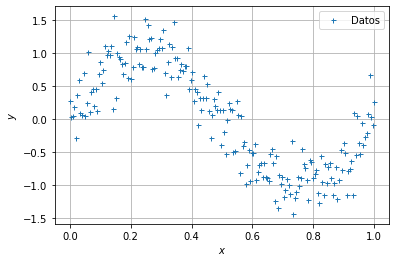

In [80]:
plt.plot(x, y, '+', ms=5, label='Datos')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()
plt.legend(loc="best")

In [81]:
# Split train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [82]:
# Definición del modelo
model_10 = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=10)),
    ('scaler', StandardScaler()),
    ('lin_reg', LinearRegression())
])

In [83]:
# Ajuste del modelo
model_10.fit(x_train.reshape(-1, 1), y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=10, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

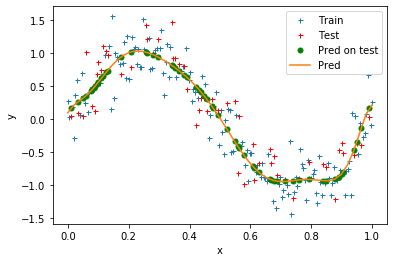

In [84]:
# Visualización del modelo
x_eval = np.linspace(0, 1)
plt.plot(x_train, y_train, '+', ms=5, label="Train")
plt.plot(x_test, y_test, '+r', ms=5, label="Test")
plt.plot(x_test, model_10.predict(x_test.reshape(-1, 1)), 'og', ms=5, label="Pred on test")
plt.plot(x_eval, model_10.predict(x_eval.reshape(-1, 1)), label="Pred")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

In [85]:
# Score sobre datos de entrenamiento
model_10.score(x_train.reshape(-1, 1), y_train)

0.8884957772102334

In [86]:
# Score sobre datos de prueba
model_10.score(x_test.reshape(-1, 1), y_test)

0.827441938600363

## 2. Distribución normal

Antes de entrar en detalles repasemos un poco la distribución normal.

### 2.1. Distribución normal univariada

Se dice que una VA distribuye normal si su función de densidad de probabilidad es:

$$
\mathcal{N}(x|\mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left\{-\frac{(x - \mu)^2}{2 \sigma^2}\right\}
$$

con parámetros $\mu \in \mathbb{R}$: media de la VA X, y $\sigma^2 \in \mathbb{R}_{\geq0}$: varianza de la VA X.

**Ejercicio.** Demostrar que:

1. 
$$
\int_{-\infty}^{\infty} \mathcal{N}(x|\mu, \sigma^2) = 1.
$$

2. 
$$
\mu = \arg \max_{x} \mathcal{N}(x|\mu, \sigma^2)
$$

¿Cómo luce esta densidad?

In [88]:
# Importar scipy.stats
from scipy import stats
# Importar numpy
import numpy as np
# Importar matplitlib.pyplot
from matplotlib import pyplot as plt

In [89]:
# Tres VA normales
X = stats.norm(loc=0, scale=1)
Y = stats.norm(loc=1, scale=1)
Z = stats.norm(loc=0, scale=3)

In [90]:
# Vector x para graficar
x = np.linspace(-10, 10, 1001)

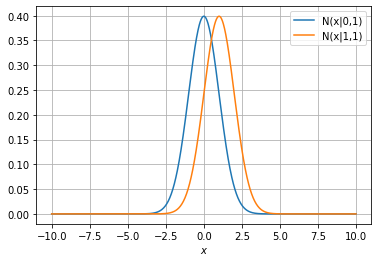

In [91]:
# Graficar
plt.plot(x, X.pdf(x), label=r'N(x|0,1)')
plt.plot(x, Y.pdf(x), label=r'N(x|1,1)')
plt.xlabel('$x$')
plt.grid()
plt.legend(loc="best")

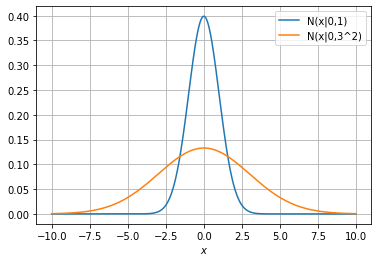

In [92]:
plt.plot(x, X.pdf(x), label=r'N(x|0,1)')
plt.plot(x, Z.pdf(x), label=r'N(x|0,3^2)')
plt.xlabel('$x$')
plt.grid()
plt.legend(loc="best")

In [93]:
X.rvs(10)

array([-0.96450631, -1.00528335,  0.9628383 ,  0.6862536 ,  0.35386288,
        1.64808519,  0.36138455,  2.63367067, -1.09877303,  0.71134228])

In [94]:
Z.rvs(10)

array([-1.54953224e+00,  4.01675768e+00, -4.02186313e-03, -3.81293265e+00,
        2.68982555e-01,  4.50803265e+00,  1.22303939e+00,  1.97719390e+00,
       -4.65538042e-01,  2.47633126e+00])

## 3. Desde una perspectiva probabilística

Para modelar la incertidumbre en este tipo de relaciones, podemos suponer que el ruido aditivo sigue una densidad Gaussiana:

$$
y = \phi(x)^T w + \epsilon,
$$

con $\epsilon \sim \mathcal{N}(0, \beta^{-1})$.

De manera que

$$
p(y | x, w) = \mathcal{N}(y | \phi(x)^T w, \beta^{-1}),
$$

es decir, con la relación $\phi(x)^T w$ modela el valor esperado de la variable de salida $y$.

### Estimación de parámetros: Máxima verosimilitud

Para estimar los parámetros, escribimos entonces la función de verosimilitud:

$$
\mathcal{L}(w) = p(y | X, w) = \prod_{i=1}^{N} \mathcal{N}(y_i | \phi(x_i)^T w, \beta^{-1}).
$$

Por tanto, la log verosimilitud es:

\begin{align}
l(w) & = \log \prod_{i=1}^{N} \mathcal{N}(y_i | \phi(x_i)^T w, \beta^{-1}) \\
     & = \sum_{i=1}^{N} \log\mathcal{N}(y_i | \phi(x_i)^T w, \beta^{-1}) \\
     & = \frac{N}{2}\log\beta - \frac{N}{2}\log(2 \pi) - \frac{\beta}{2} \sum_{i=1}^{N} (y_i - \phi(x_i)^T w)^2 \\
     & = \frac{N}{2}\log\beta - \frac{N}{2}\log(2 \pi) - \frac{\beta}{2} \left|\left|y - \Phi w\right|\right|^2,
\end{align}

donde:

$$
\Phi = \left[
    \begin{array}{ccc}
    - & \phi(x_1)^T  & - \\
    - & \phi(x_2)^T  & - \\
      & \vdots       &   \\
    - & \phi(x_N)^T  & - \\
    \end{array}
\right] \in \mathbb{R}^{N \times d}
$$

De esta manera, usando el principio de máxima verosimilitud, obtenemos que:

$$
\hat{w}_{MLE} = \arg \max_{w} l(w) = \arg \min_{w} \left|\left|y - \Phi w\right|\right|^2,
$$

justo como en mínimos cuadrados.

Observamos que la estimación de parámetros por máxima verosimilitud, explica nuestra intuición detrás de mínimos cuadrados.

Además, **una vez más concluimos que el enfoque de máxima verosimilitud nos puede traer problemas de overfitting**.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>